## Preliminaries

In [55]:
import math
import numpy as np
np.set_printoptions(legacy='1.25') #makes np floats look normal
import matplotlib.pyplot as plt

## Question 1
In this question we create a method that takes a function and some nodes and uses that to create an interpolating polynomial. My strategy is as follows:
 1. Take the provided nodes and create a lagrange coefficient of each of the points. They will have the form $$\phi_i(x) = \frac{(x -x_0)...(x-x_{i-1})(x-x_{i+1})...(x-x_n)}{(x_i-x_0)...(x_i-x_{i-1})(x_i-x_{i+1})...(x_i-x_n)}$$ This gives them the property that $$\phi_i(x_j) =\begin{cases} 0 && i \neq j \\ 1 && i = j \end{cases}$$
1. Next we evaluate the function at each of the nodes
1. Finally we combine these to create the final polynomial, which has the form $$L_nf = f(x_0)\phi_0 + ... f(x_n)\phi_n$$ which is the lagrange interpolating polynomial, calculated using lagrange coefficients.


In [4]:
#first step
def phi_i_maker(nodes, xi): #nodes is a list of nodes, (x0, x1, ..., xi,...xn)
    def phi_i(x):
        top = 1
        for node in nodes:
            if node != xi:
                top = top*(x - node)
        bottom = 1
        for node in nodes:
            if node != xi:
                bottom = bottom*(xi-node)
        return top/bottom

    return phi_i
    
phi1 = phi_i_maker([2,1,3], 1)
print(phi1(2))
print(phi1(1))
print(phi1(3))
        

0.0
1.0
0.0


In [5]:
#Create a dictionary with a base function and a phi value for each node
def Value_and_Phi_dict_maker(nodes, function):
    Dict = {}
    for node in nodes:
        val = function(node)
        phi = phi_i_maker(nodes, node)
        pair = (phi, val)
        Dict[node] = pair
    return Dict



In [6]:
def L_nf_maker(nodes,function):
    def L_nf(x):
        Dict = Value_and_Phi_dict_maker(nodes, function)
        poly = 0
        for key in Dict:
            phi, value = Dict[key]
            poly = poly + value*phi(x)
            
        return poly
            
        

    return L_nf

### Now some examples
we start with looking at a sine function with 6 equally spaced points in $(0,2\pi)$

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 6.283185307179586]


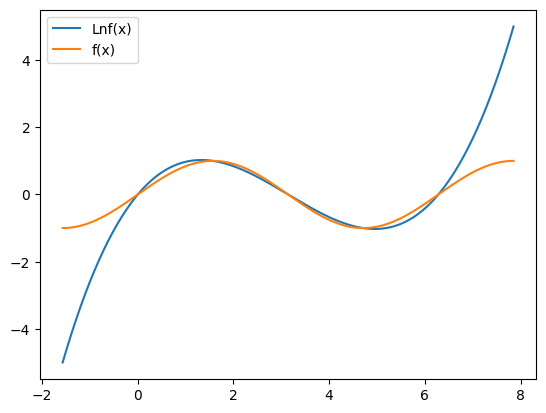

In [110]:
nodes1  = list(np.linspace(0, 2*math.pi, 5))
print(nodes1)
SineInterpol = L_nf_maker(nodes = nodes1, function = math.sin)

t = np.linspace(-1/2*math.pi, 2.5*math.pi, 400)
interpol = SineInterpol(t)
function = np.sin(t)
plt.plot(t, np.c_[interpol, function], label=['Lnf(x)', 'f(x)']);
plt.legend();
plt.show()

[0.0, 2.0943951023931953, 4.1887902047863905, 6.283185307179586]


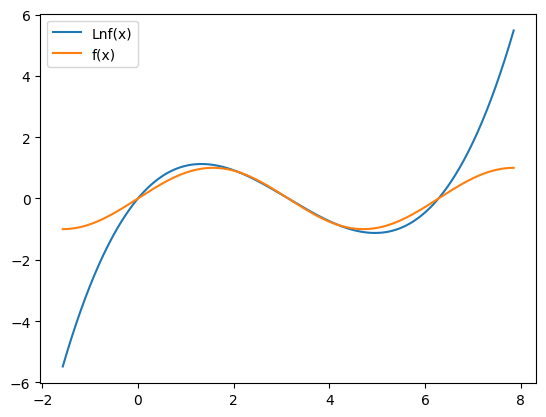

In [109]:
#with 4 points
nodes1  = list(np.linspace(0, 2*math.pi, 4))
print(nodes1)
SineInterpol = L_nf_maker(nodes = nodes1, function = math.sin)

t = np.linspace(-1/2*math.pi, 2.5*math.pi, 400)
interpol = SineInterpol(t)
function = np.sin(t)
plt.plot(t, np.c_[interpol, function], label=['Lnf(x)', 'f(x)']);
plt.legend();
plt.show()

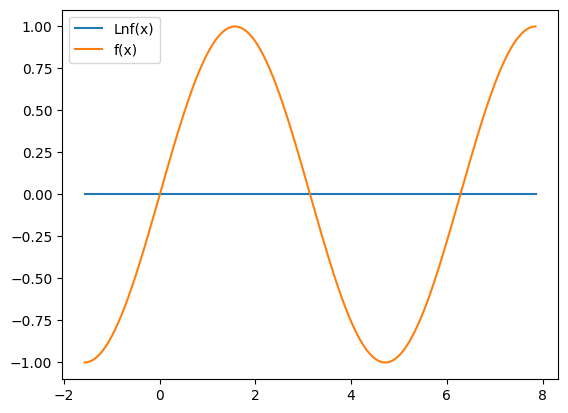

In [111]:
# and with 3
nodes1  = list(np.linspace(0, 2*math.pi, 3))

Interpol = L_nf_maker(nodes = nodes1, function = math.sin)

t = np.linspace(-1/2*math.pi, 2.5*math.pi, 400)
interpol =Interpol(t)
function = np.sin(t)
plt.plot(t, np.c_[interpol, function], label=['Lnf(x)', 'f(x)']);
plt.legend();
plt.show()



So we see the function works pretty well for sinx, Although not how for 3 nodes the result is linear because all the nodes are where sinx = 0

Now look at a few more

[-3.0, -1.4, 0.20000000000000018, 1.8000000000000007, 3.4000000000000004, 5.0]


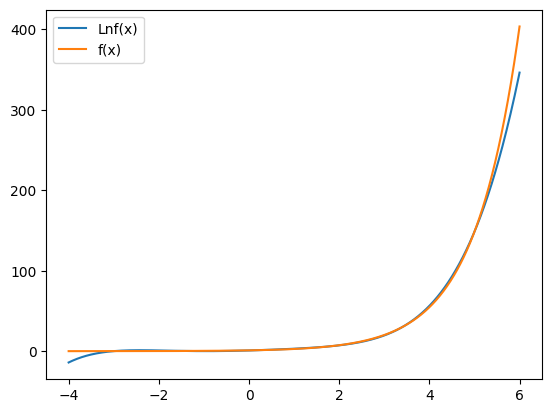

In [304]:
#e^x interpolated on 6 points evenly spaced between -3 and 5
nodes  = list(np.linspace(-3, 5, 6))
print(nodes)
Function = np.exp

Interpol = L_nf_maker(nodes, Function)

t = np.linspace(-4, 6, 1000)
interpol = Interpol(t)
function = Function(t)
plt.plot(t, np.c_[interpol, function], label=['Lnf(x)', 'f(x)']);
plt.legend();

plt.show()

[0.0, 33.333333333333336, 66.66666666666667, 100.0]


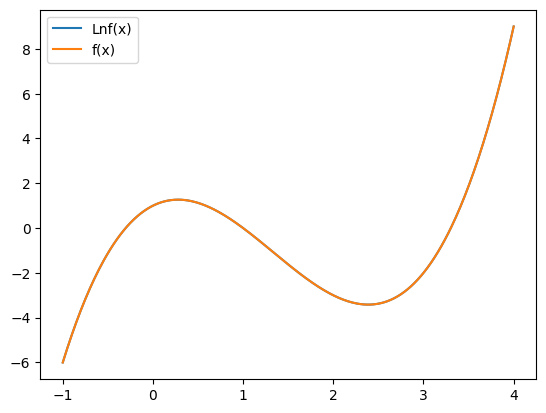

In [113]:
# a polynomial of same degree as the interpolation
def Deg3Poly1(x):
    return x**3 -4*x**2 + 2*x + 1


nodes  = list(np.linspace(0, 100, 4)) 
print(nodes)
Function = Deg3Poly1

Interpol = L_nf_maker(nodes, Function)

t = np.linspace(-1, 4, 400)

interpol = Interpol(t)
function = Function(t)

plt.plot(t, np.c_[interpol, function], label=['Lnf(x)', 'f(x)']);
plt.legend();

plt.show()

In this example note that the node positions are entirely inappropriate for the interpolation but the polynomial is still correct

finally look at a case where the function is discontinuous

[-2.0, -1.2, -0.3999999999999999, 0.40000000000000036, 1.2000000000000002, 2.0]


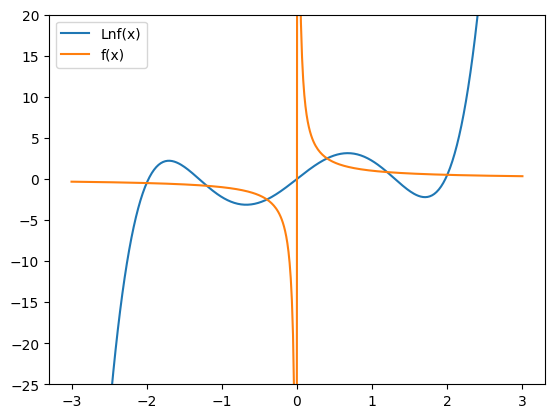

In [305]:
nodes  = list(np.linspace(-2, 2, 6)) 
print(nodes)
Function = np.reciprocal
Interpol = L_nf_maker(nodes, Function)

t = np.linspace(-3, 3, 400)

interpol = Interpol(t)
function = Function(t)

plt.plot(t, np.c_[interpol, function], label=['Lnf(x)', 'f(x)']);
plt.ylim(-25,20)
plt.legend();

plt.show()

[-2.0, -1.7333333333333334, -1.4666666666666668, -1.2, -0.9333333333333333, -0.6666666666666667, -0.3999999999999999, -0.1333333333333333, 0.1333333333333333, 0.3999999999999999, 0.6666666666666665, 0.9333333333333331, 1.2000000000000002, 1.4666666666666668, 1.7333333333333334, 2.0]


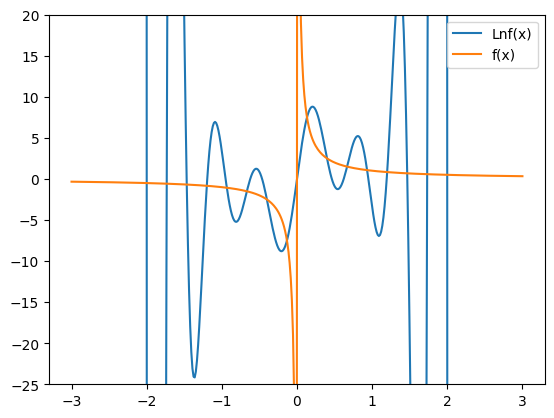

In [306]:

nodes  = list(np.linspace(-2, 2, 16)) #many nodes causes little improvent.
print(nodes)
Function = np.reciprocal
Interpol = L_nf_maker(nodes, Function)

t = np.linspace(-3, 3, 400)

interpol = Interpol(t)
function = Function(t)

plt.plot(t, np.c_[interpol, function], label=['Lnf(x)', 'f(x)']);
plt.ylim(-25,20)
plt.legend();

plt.show()

And we see that in this case the interpolation is not very good. In fact we see the runge phenomenon manifest  when we have many nodes(foreshadowing)

# Question 2
we calculate maximum error by checking the difference at 1000 points in the range and recording the maximum difference

In [59]:
def MaxError(a,b,n,function):#n is the number of nodes function is the function to interpolate
    nodes = list(np.linspace(a,b,n))
    lnf = L_nf_maker(nodes, function)
    testpoints = list(np.linspace(a, b, 1000))
    worstyet = 0
    for point in testpoints:
        error = abs(function(point)-lnf(point))
        if error > worstyet:
            worstyet = error
    return worstyet


In [60]:
MaxError(-math.pi, math.pi, 10, math.sin)

7.225299980445632e-05

In [61]:
MaxError(-math.pi, math.pi, 5, math.sin)

0.18075779655514768

In [63]:
MaxError(-3, 3, 3, math.exp)

4.3196341224406645

In [299]:
MaxError(-3, 3, 50, math.exp)

0.00033128170492346953

We see that for sin(x) the interpolation works fairly well, with bigger values, at least to a point, reducing error. 

exp(x) also seems to improve with more interpolation points, though not as quickly.


Reciprocals are tricky, as it gets arbitrarily large close to x=0, while the polynomial does not. There is also the added problem of evenly spaced nodes potentially causing an error if one lands on x=0 (which I have avoided by choosing even numbers of nodes). The spikes seen in question 1 are also a potential cause for alarm.

In [309]:
MaxError(-1,1,6,np.reciprocal)

998.9711935131747

In [308]:
MaxError(-1, 1, 10, np.reciprocal)

998.9040122231835

In [300]:
MaxError(-10,10, 3, Deg3Poly1)

384.9000899544937

In [302]:
MaxError(-10,10, 4, Deg3Poly1)


4.547473508864641e-13

Finaly, polynomials are poor up until the degree of the interpolation is of the same degree as the function itself, at which point it becomes identical(up to rounding errors caused by their different expressions)

# Question 3

<function matplotlib.pyplot.show(close=None, block=None)>

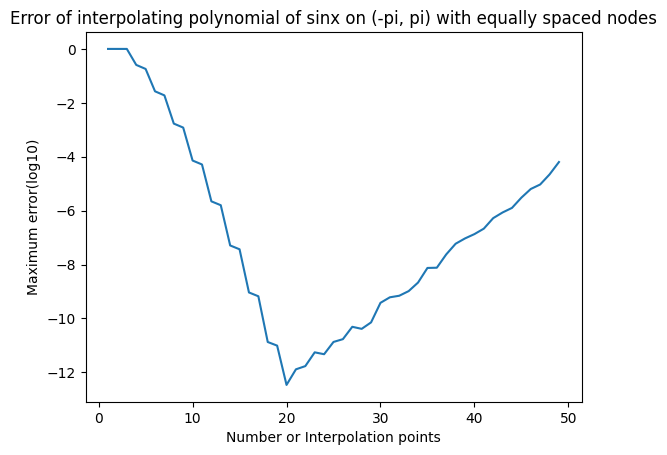

In [307]:
t = np.arange(1,50, 1)
y = [math.log10(MaxError(-math.pi, math.pi, i, math.sin)) for i in t]
plt.plot(t,y)
plt.xlabel("Number or Interpolation points"),
plt.ylabel("Maximum error(log10)")
plt.title("Error of interpolating polynomial of sinx on (-pi, pi) with equally spaced nodes")
plt.show
            

<function matplotlib.pyplot.show(close=None, block=None)>

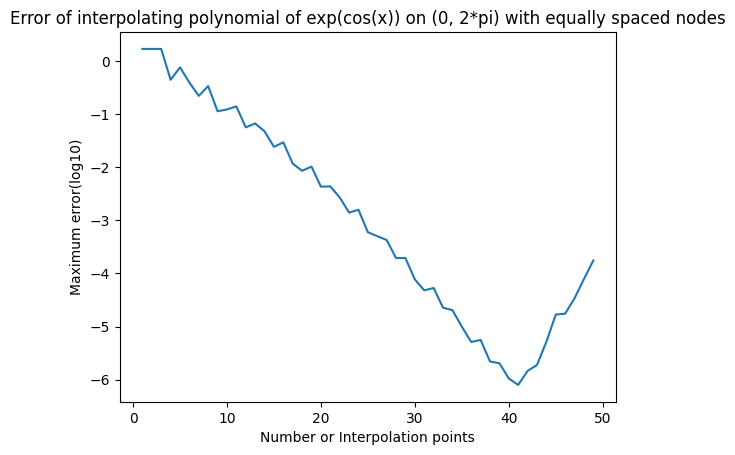

In [97]:
def testfunction(x):
    return math.exp(math.sin(x))
t = np.arange(1,50, 1)
y = [math.log10(MaxError(-math.pi, math.pi, i, testfunction)) for i in t]
plt.plot(t,y)
plt.xlabel("Number or Interpolation points"),
plt.ylabel("Maximum error(log10)")
plt.title("Error of interpolating polynomial of exp(cos(x)) on (0, 2*pi) with equally spaced nodes")
plt.show

The obvious thing that we notice is that up until a point(20 nodes in the case of sin(x), 40 nodes in the case of exp(cos(x))) we see a roughly log linear decrease in maximum error. After that the interpolation begins to get worse, again in a log linear fashion. I am not entirely certain why this happens, but what i suspect is happening is that as the points get close together we begin to run into numerical problems arising from all the divisions by small numbers present in the form of interpolating polynomial I chose

# Question 4
Now we try to investigate the runge phenomenon, which is a thing that can happen with certain functions when interpolating using equidistant nodes where as the number of nodes increases the error increases without bound. A canonical example function that exhibits the Runge-Phenomenon is $$f(x) = \frac{1}{1+x^2}$$ This is the example given in Süli & Mayers, taken from Runge. 

The condition for the Runge phenomenon to occur is somewhat complicated, however from the estimate for maximum error done in class which has a general form $$f(x) - p(x) = \frac{f^{n+1}(\xi)}{(n+1)!}\pi_{n+1}(x)$$

we can see that having higher order derivatives that get large is a simple first condition for a badly behaved interpolating polynomial, which is the case for the example chosen.

We graph this function against a relatively high degree polynomial to see the shape of the runge phenomenon and then look at how the maximum error changes.

In [ ]:
def rungefunction(x):
    return(1/(1+x**2))

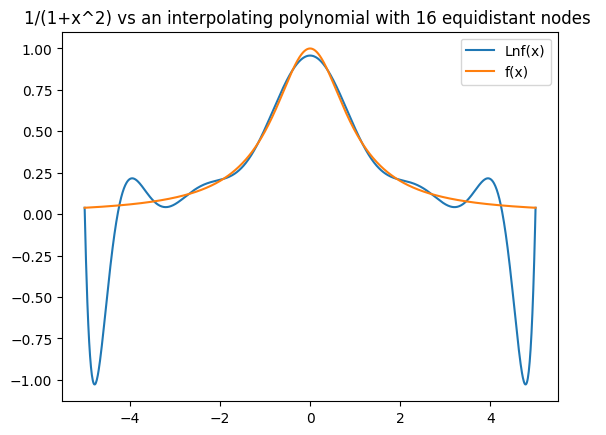

In [160]:
#graph the function(Red) and Interpolating polynomial(green)

nodes  = list(np.linspace(-5, 5, 14))

Interpol = L_nf_maker(nodes = nodes, function = rungefunction)

t = np.linspace(-5, 5, 1000)
interpol = Interpol(t)
function = rungefunction(t)

plt.plot(t, np.c_[interpol, function], label=['Lnf(x)', 'f(x)']);
plt.legend();
plt.title("1/(1+x^2) vs an interpolating polynomial with 16 equidistant nodes ")

plt.show()

We see that we get large runge spikes at the edgees amd a fairly good fit near the middle.

<function matplotlib.pyplot.show(close=None, block=None)>

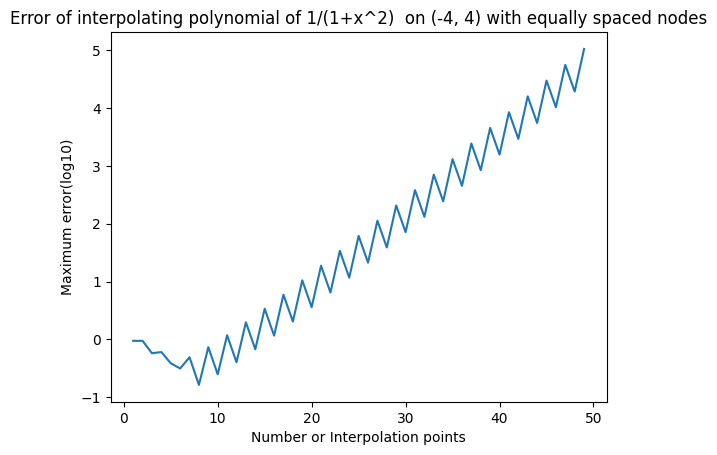

In [115]:
#now looking at maximum error as the number of nodes increases
t = np.arange(1,50, 1)
y = [math.log10(MaxError(-5, 5, i, rungefunction)) for i in t]
plt.plot(t,y)
plt.xlabel("Number or Interpolation points"),
plt.ylabel("Maximum error(log10)")
plt.title("Error of interpolating polynomial of 1/(1+x^2)  on (-5, 5) with equally spaced nodes")
plt.show

We see that for functions exhibiting the runge phenomenon the maximum error never gets very smal and quickly beings to grow exponentially. There is a sawtooth pattern to the error like that seen in question 3, which i believe has somethimg to do with the parity of the interpolating polynomial.

# Question 5
The way to avoid the runge phenomenon(which we expect to exist, since the weierstrauss approximation theorm says that all continuos functions can be uniformly approximated on an interval by a polynomial) is to use unequally spaced nodes, namely the chebyshev nodes.
These can be thought of as the projection of points equally spaced around a semicircle onto the x-axis. These are the roots of $\cos(n\pi)$. More explicitly, to get m points in \[-1,1] we have $$x_k = \cos \Biggl( \frac{(2k-1)\pi}{2m}\Biggr)$$ for k = 1,...,m.

we can shift transform these points to be correct for \[a,b] by taking $$x \leftarrow l(x) = \frac{b-a}{2}x + \frac{b+a}{2}$$.

In [153]:
def chebyshev_nodes(a, b, m):
    nodes = []
    for i in range(1,m+1):
        node = math.cos(((2*i - 1)*math.pi)/(2*m))
        nodes.append(node)
    nodes = [x*(b-a)/2 + (b+a)/2 for x in nodes]
    return nodes
    

In [154]:
def chebyshev_interpol_maker(a,b,m,function):
    nodes = chebyshev_nodes(a,b,m)
    return L_nf_maker(nodes,function)

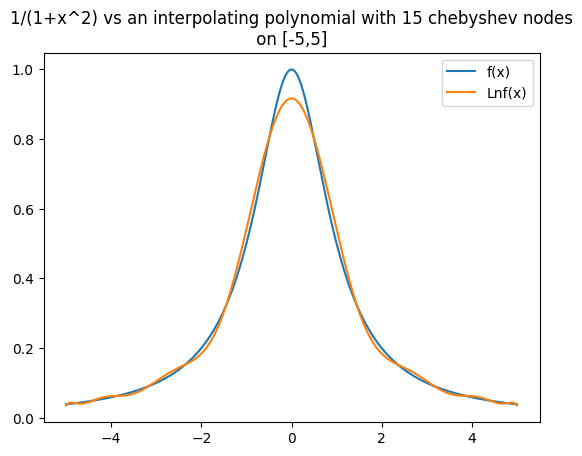

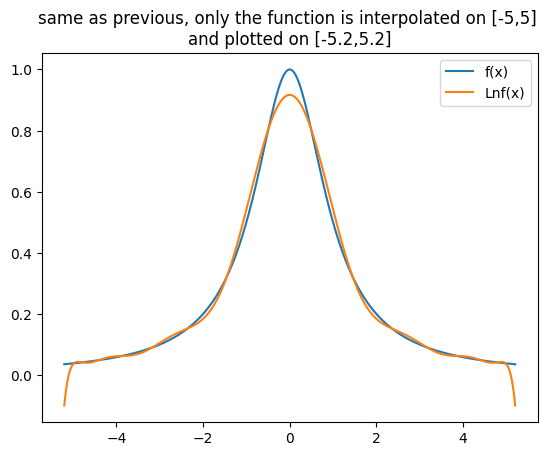

In [161]:
Interpol = chebyshev_interpol_maker(-5,5,16, rungefunction)

t = np.linspace(-5, 5, 1000)
interpol = Interpol(t)
function = rungefunction(t)

plt.plot(t, np.c_[function,interpol], label=['f(x)','Lnf(x)']);
plt.legend();
plt.title("1/(1+x^2) vs an interpolating polynomial with 15 chebyshev nodes\n on [-5,5] ")
plt.show()

t = np.linspace(-5.2, 5.2, 1000)
interpol = Interpol(t)
function = rungefunction(t)

plt.plot(t, np.c_[function,interpol], label=['f(x)','Lnf(x)']);
plt.legend();
plt.title("same as previous, only the function is interpolated on [-5,5] \nand plotted on [-5.2,5.2]")
plt.show()

 so we see that chebyshev nodes have removed the problem of the runge phenomenom. Note that outside the interval the approximation still stops being good. This is demonstrated in the second plot.
 We now look at how the maximum error changes with increasing number of nodes.

In [156]:
#modify the max error function to use chebyshev nodes
def ChebyshevMaxError(a,b,m,function):
    interpol = chebyshev_interpol_maker(a,b, m, function)
    testpoints = list(np.linspace(a, b, 1000))
    worstyet = 0
    for point in testpoints:
        error = abs(function(point)-interpol(point))
        if error > worstyet:
            worstyet = error
    return worstyet


<function matplotlib.pyplot.show(close=None, block=None)>

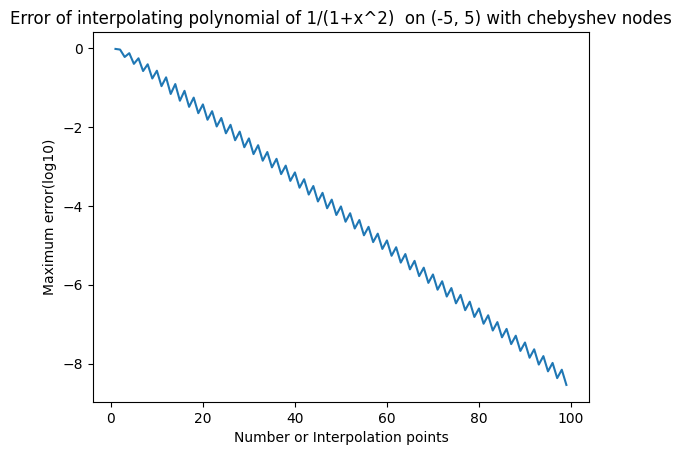

In [157]:
t = np.arange(1,100, 1)
y = [math.log10(ChebyshevMaxError(-5, 5, i, rungefunction)) for i in t]
plt.plot(t,y)
plt.xlabel("Number or Interpolation points"),
plt.ylabel("Maximum error(log10)")
plt.title("Error of interpolating polynomial of 1/(1+x^2)  on (-5, 5) with chebyshev nodes")
plt.show

In [158]:
print((list(range(1,16))))
print(ChebyshevMaxError(-5,5,10,rungefunction))
print(ChebyshevMaxError(-5,5,11,rungefunction))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
0.269158107147355
0.10915351076845359


And we see that the approximation gets better. Note however that the approximation gets good a lot slower than it did with 'nice' functions as discussed in question 3. The sawtooth pattern is also quite apparent, with polynomials with an even number of nodes having larger error. **check this** also need to go over previous ones and check number of nodes is accurate.

# Question 6
For this question my method it to create the linear function connecting each set of adjacent nodes, and then use the piecewise function utility in numpy to define the peicewise linear interpolation

In [249]:
def lineInter(x1,x2,function):
    y1 = function(x1)
    y2 = function(x2)
    def line(x):
        return ((y2-y1))/(x2-x1)*(x-x1) + y1 #linear function connecting (x1,y1) and (x2,y2)
       
    return line

In [261]:
def myfit_maker(a,b, n, function):
    nodes = np.linspace(a,b,n)
    def myfit(x):
        condlist = [nodes[i]<=x<nodes[i+1] for i in range(n-1)] #set one side as equal to avoid conflicts or holes
        funclist = [lineInter(nodes[i],nodes[i+1],function) for i in range(n-1)] #create the function for each condition
        return np.piecewise(x,condlist,funclist)
    return np.vectorize(myfit) #return the function created(having made it able to accept vectors as inputs)

## Some examples
I will demonstrate the effectivennss

<function matplotlib.pyplot.show(close=None, block=None)>

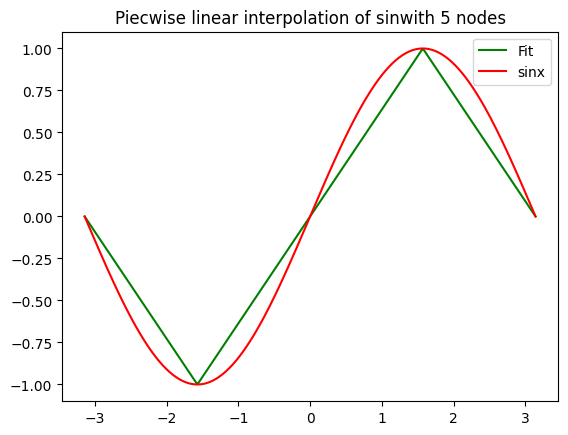

In [280]:
nodes = 5
a = -math.pi
b = math.pi
interpol = myfit_maker(a,b,nodes, math.sin)

x = np.linspace(a,b,400)
y1 = interpol(x)
y2 = np.sin(x)
plt.plot(x,y1, 'g', label = "Fit")
plt.plot(x,y2, 'r', label = "sinx")
plt.title(f'Piecwise linear interpolation of sinwith {nodes} nodes')
plt.legend()
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

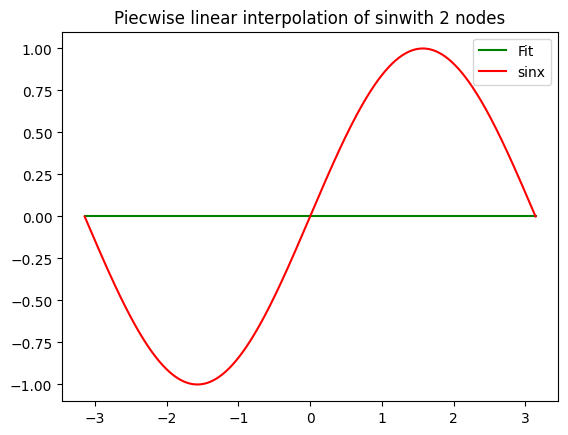

In [281]:
nodes = 2
a = -math.pi
b = math.pi
interpol = myfit_maker(a,b,nodes, math.sin)

x = np.linspace(a,b,400)
y1 = interpol(x)
y2 = np.sin(x)
plt.plot(x,y1, 'g', label = "Fit")
plt.plot(x,y2, 'r', label = "sinx")
plt.title(f'Piecwise linear interpolation of sinwith {nodes} nodes')
plt.legend()
plt.show

In [ ]:
nodes = 3
a = -math.pi
b = math.pi
interpol = myfit_maker(a,b,nodes, math.sin)

x = np.linspace(a,b,400)
y1 = interpol(x)
y2 = np.sin(x)
plt.plot(x,y1, 'g', label = "Fit")
plt.plot(x,y2, 'r', label = "sinx")
plt.title(f'Piecewise linear interpolation of sin with {nodes} nodes')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

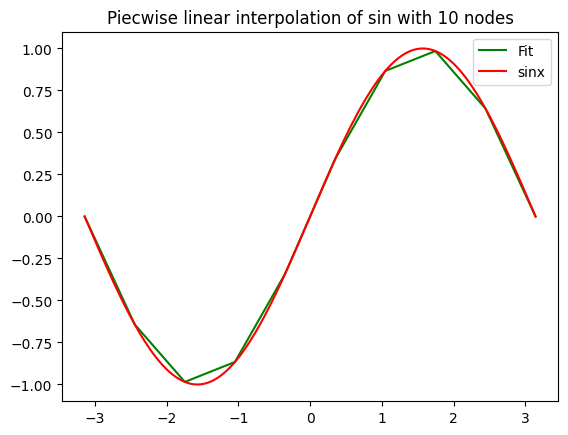

In [282]:
nodes = 10
a = -math.pi
b = math.pi
interpol = myfit_maker(a,b,nodes, math.sin)

x = np.linspace(a,b,400)
y1 = interpol(x)
y2 = np.sin(x)
plt.plot(x,y1, 'g', label = "Fit")
plt.plot(x,y2, 'r', label = "sinx")
plt.title(f'Piecewise linear interpolation of sin with {nodes} nodes')
plt.legend()
plt.show

In [ ]:
nodes = 20
a = -math.pi
b = math.pi
interpol = myfit_maker(a,b,nodes, math.sin)

x = np.linspace(a,b,400)
y1 = interpol(x)
y2 = np.sin(x)
plt.plot(x,y1, 'g', label = "Fit")
plt.plot(x,y2, 'r', label = "sinx")
plt.title(f'Piecewise linear interpolation of sin with {nodes} nodes')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

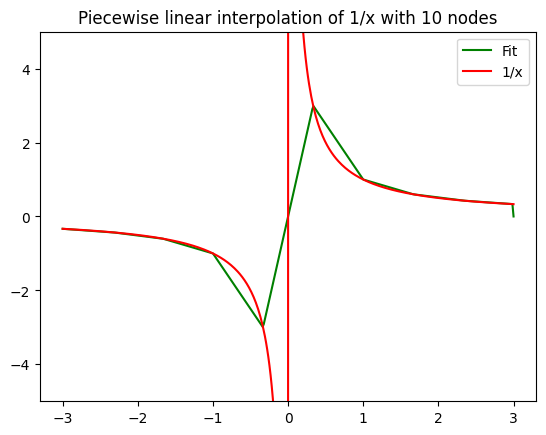

In [290]:
nodes = 10
a = -3
b = 3
interpol = myfit_maker(a,b,nodes, np.reciprocal)

x = np.linspace(a,b,400)
y1 = interpol(x)
y2 = np.reciprocal(x)
plt.plot(x,y1, 'g', label = "Fit")
plt.plot(x,y2, 'r', label = "1/x")
plt.ylim(-5,5)
plt.title(f'Piecewise linear interpolation of 1/x with {nodes} nodes')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

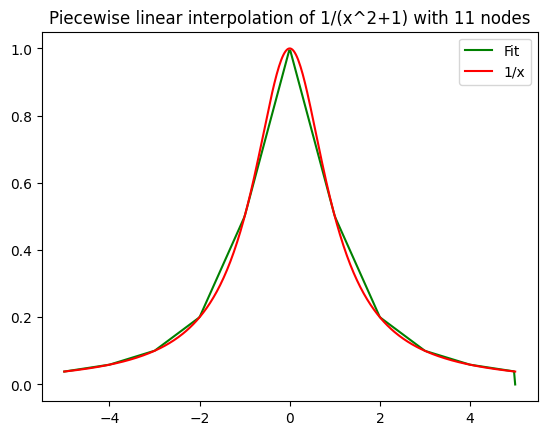

In [288]:
nodes = 11
a = -5
b = 5
interpol = myfit_maker(a,b,nodes, rungefunction)

x = np.linspace(a,b,400)
y1 = interpol(x)
y2 = rungefunction(x)
plt.plot(x,y1, 'g', label = "Fit")
plt.plot(x,y2, 'r', label = "1/x")
plt.title(f'Piecewise linear interpolation of 1/(x^2+1) with {nodes} nodes')
plt.legend()
plt.show